# Predictive Analytics

# Causality Analysis between Google trends and the BTC-ETH-ADA Prices 

## Team 2 

Ashwath Ramesh 

Kavuri Lakshmi Kausalya 

Rohit Muralitharan 

School of Graduate Professional Studies 

Data Analytics 

GV – IE 575 - Predictive Analytics 

Spring II Semester, 2022

## Problem Statement

There are a lot of market investors, who tend to invest in the digital currencies i.e., cryptocurrencies and they tend to look for guides to get them to profit. So, the objective of our project is to find if there is a causal relationship between Google Trends and The prices of crypto currencies and design a model for predicting the percentage change in the cryptocurrencies with the help of ARIMA, XGBoost and LSTM models, while considering factors that affect their value to rise, drop or rise again or plummet further.

**Keywords:** Crypto currencies; Causal Relationship; Google Trends; ARIMA; XGBoost; LSTM

## Data Collection

* Source: https://trends.google.com/trends/?geo=US and The market prices for Bitcoin, Cardano and Ethereum were given to us at the start of the project

* Description: The market prices dataset contain information about the date(yyyy/mm/dd, hh:mm:ss), High, Low, Open, Close, Volume and Market Cap. The tends dataset contain information about the date(yyyy/mm/dd) and Trend.

* Keywords: Date; Close; Trend

### Required packages 

In [79]:
# !pip install pytrends
# gtrend.py file is added to the submission
#!pip install pmdarima
#!pip install xgboost

  Using cached xgboost-1.6.0-py3-none-win_amd64.whl (126.1 MB)


### Importing packages

In [89]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
from pytrends import dailydata
import matplotlib.dates as mdates
from cycler import cycler
from matplotlib.cm import get_cmap
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
#gtrend is a .py file attached to the submission
import gtrend
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from collections import OrderedDict
from sklearn.metrics import accuracy_score
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import concatenate
from keras.layers import Bidirectional
import xgboost as xgb
from xgboost import plot_importance, plot_tree

#### Functions Used

In [3]:
plt.style.use('seaborn-darkgrid')
matplotlib.rcParams['font.family'] = ['Heiti TC']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)

def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)

# Collecting the Daily trends Data

The trends were collected, downloaded and attached to the submission

Below is the code for how we collected the data for Bitcoin as an example

### Bitcoin

In [4]:
pytrend = TrendReq(hl='en-US')
keyword = 'Bitcoin'
start = '2015-08-08'
end = '2021-07-06'
geo=''
cat=0
gprop=''

In [5]:
overlapping = gtrend.get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0)

Fetching 'Bitcoin' for period:2020-10-10 2021-07-06
Fetching 'Bitcoin' for period:2020-04-24 2021-01-18
Normalize by overlapping period:2020-10-10 2021-01-18
Fetching 'Bitcoin' for period:2019-11-07 2020-08-02
Normalize by overlapping period:2020-04-24 2020-08-02
Fetching 'Bitcoin' for period:2019-05-22 2020-02-15
Normalize by overlapping period:2019-11-07 2020-02-15
Fetching 'Bitcoin' for period:2018-12-04 2019-08-30
Normalize by overlapping period:2019-05-22 2019-08-30
Fetching 'Bitcoin' for period:2018-06-18 2019-03-14
Normalize by overlapping period:2018-12-04 2019-03-14
Fetching 'Bitcoin' for period:2017-12-31 2018-09-26
Normalize by overlapping period:2018-06-18 2018-09-26
Fetching 'Bitcoin' for period:2017-07-15 2018-04-10
Normalize by overlapping period:2017-12-31 2018-04-10
Fetching 'Bitcoin' for period:2017-01-27 2017-10-23
Normalize by overlapping period:2017-07-15 2017-10-23
Fetching 'Bitcoin' for period:2016-08-11 2017-05-07
Normalize by overlapping period:2017-01-27 2017-

<AxesSubplot:xlabel='date'>

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


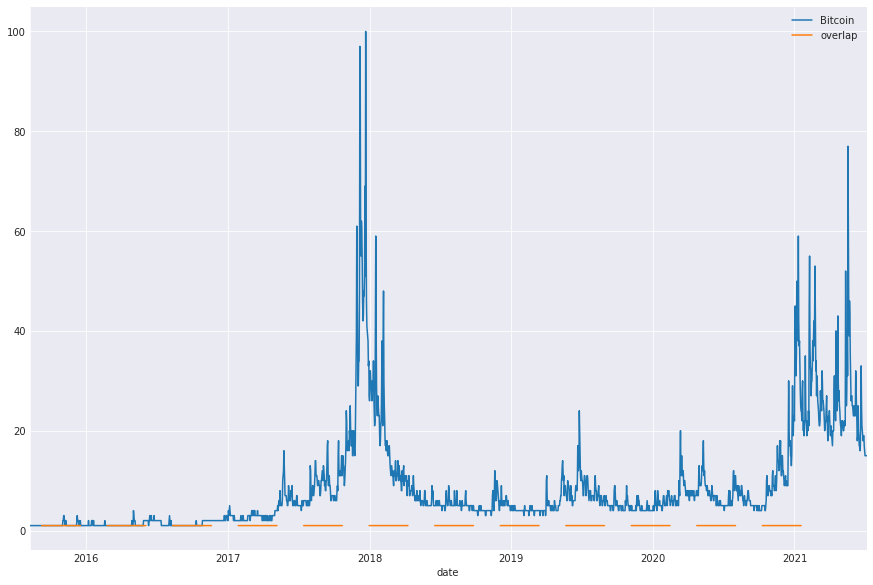

In [6]:
overlapping.plot(figsize=(15,10))

In [7]:
start_d = datetime.strptime(start, '%Y-%m-%d')
end_d = datetime.strptime(end, '%Y-%m-%d')
s_year = start_d.year
s_mon = start_d.month
e_year = end_d.year
e_mon = end_d.month

dailydata = dailydata.get_daily_data(word= keyword,
                 start_year= s_year,
                 start_mon= s_mon,
                 stop_year= e_year,
                 stop_mon= e_mon,
                 geo= geo,
                 verbose= False,
                 wait_time = 1.0)

Index(['Bitcoin_unscaled', 'Bitcoin_monthly', 'isPartial', 'scale', 'Bitcoin'], dtype='object')


<AxesSubplot:xlabel='date'>

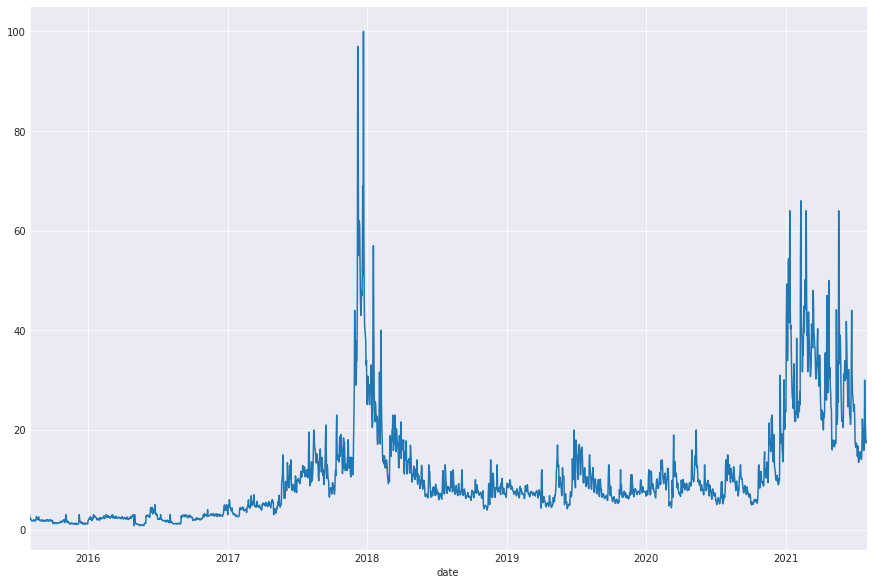

In [8]:
print(dailydata.columns)
dailydata[f'{keyword}'].plot(figsize=(15,10))

In [9]:
tf = start_d.strftime('%Y-%m-%d')+' '+end_d.strftime('%Y-%m-%d')
pytrend.build_payload(kw_list=[keyword], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
week = pytrend.interest_over_time()
week_interp = week.resample('D').mean()
week_interp[f'{keyword}'] = week_interp[f'{keyword}'].interpolate()

In [10]:
week_interp.drop(columns='isPartial', inplace=True)

<AxesSubplot:xlabel='date'>

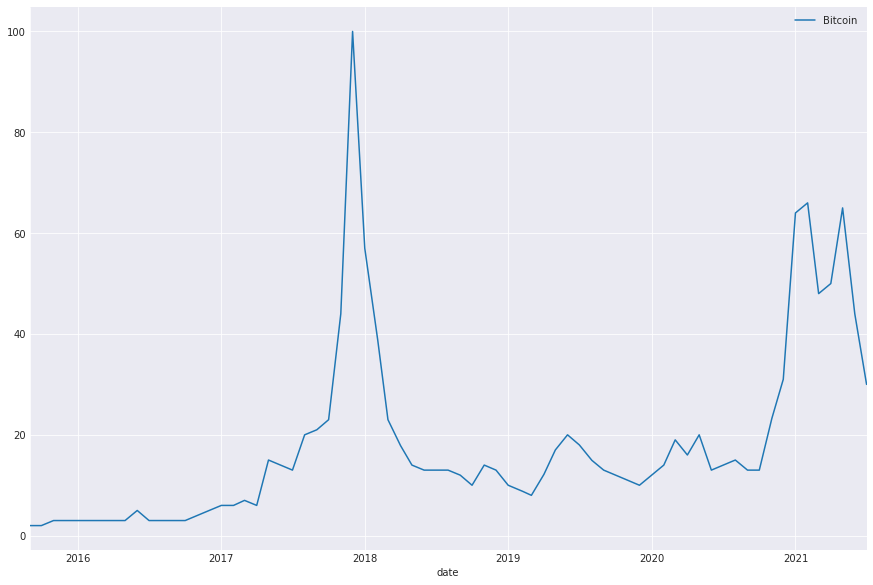

In [11]:
week_interp.plot(figsize=(15,10))

In [12]:
overlapping.loc[:,keyword]

date
2015-08-08     1.0
2015-08-09     1.0
2015-08-10     1.0
2015-08-11     1.0
2015-08-12     1.0
              ... 
2021-07-02    15.0
2021-07-03    15.0
2021-07-04    15.0
2021-07-05    15.0
2021-07-06    15.0
Freq: D, Name: Bitcoin, Length: 2160, dtype: float64

In [13]:
overlapping.columns

Index(['Bitcoin', 'overlap'], dtype='object')

In [14]:
combined = pd.concat([overlapping, dailydata.loc[:,keyword], week_interp], axis=1)

In [15]:
combined.columns = ['overlapping method', 'overlap period', 'dailydata method', 'weekly data']

In [16]:
combined.tail(20)

,overlapping method,overlap period,dailydata method,weekly data
date,,,,
2021-07-12,NaN,NaN,14.7,NaN
2021-07-13,NaN,NaN,14.7,NaN
2021-07-14,NaN,NaN,15.6,NaN
2021-07-15,NaN,NaN,15.3,NaN
2021-07-16,NaN,NaN,15.6,NaN
2021-07-17,NaN,NaN,14.1,NaN
2021-07-18,NaN,NaN,14.4,NaN
2021-07-19,NaN,NaN,17.4,NaN
2021-07-20,NaN,NaN,22.2,NaN


In [17]:
combined.columns = ['overlapping method','overlap period', 'dailydata method', 'weekly data']
combined = combined.resample('D').mean()

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


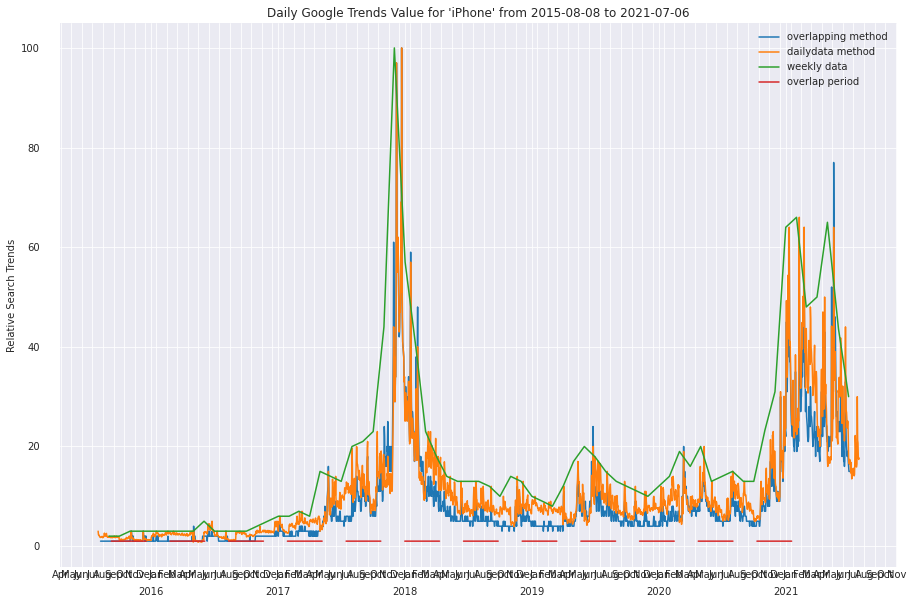

In [18]:
combined2 = combined.iloc[:, [0,2,3,1]]
combined2.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined2.index]
# c = ['royalblue', 'darkorange', 'limegreen', 'salmon']
# colors = plt.cm.Paired(np.linspace(0,1,4)) # This returns RGBA; convert:
c = []
for i in range(0,4):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
ax = combined2.plot(figsize=(15,10), color=c)
# set line colors
# c = plt.cm.hot(np.linspace(0,1,4))
# ax.set_prop_cycle(cycler('color', c))
# ax.set_prop_cycle(color=colors)
# ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
# set monthly locator
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.tick_params(direction='out', pad=20)
# set font and rotation for date tick labels
# plt.gcf().autofmt_xdate()
ax.xaxis.grid(True, which='minor')

plt.ylabel('Relative Search Trends')
# plt.xlabel('Date')
plt.title('Daily Google Trends Value for \'iPhone\' from '+start+' to '+end)
# plt.set_cmap('Pastel2')

plt.show()

In [19]:
combined.tail(20)

,overlapping method,overlap period,dailydata method,weekly data
date,,,,
2021-07-12,NaN,NaN,14.7,NaN
2021-07-13,NaN,NaN,14.7,NaN
2021-07-14,NaN,NaN,15.6,NaN
2021-07-15,NaN,NaN,15.3,NaN
2021-07-16,NaN,NaN,15.6,NaN
2021-07-17,NaN,NaN,14.1,NaN
2021-07-18,NaN,NaN,14.4,NaN
2021-07-19,NaN,NaN,17.4,NaN
2021-07-20,NaN,NaN,22.2,NaN


In [20]:
p_start = '2017-05-01'
p_end = '2017-12-31'
# p_start_d = datetime.strptime(p_start, '%Y-%m-%d')
# p_end_d = datetime.strptime(p_end, '%Y-%m-%d')
tf = p_start+' '+p_end
# geo='US'
pytrend.build_payload(kw_list=[keyword], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
daily_real = pytrend.interest_over_time()

In [21]:
combined_period = combined.loc[p_start:p_end]
combined_period  = pd.concat([combined_period,daily_real], axis=1)
combined_period.drop(columns=['isPartial','overlap period'], inplace=True)
combined_period.columns = ['overlapping method', 'dailydata method', 'weekly data', 'original data']

In [22]:
c = []
for i in range(0,7):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
c

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

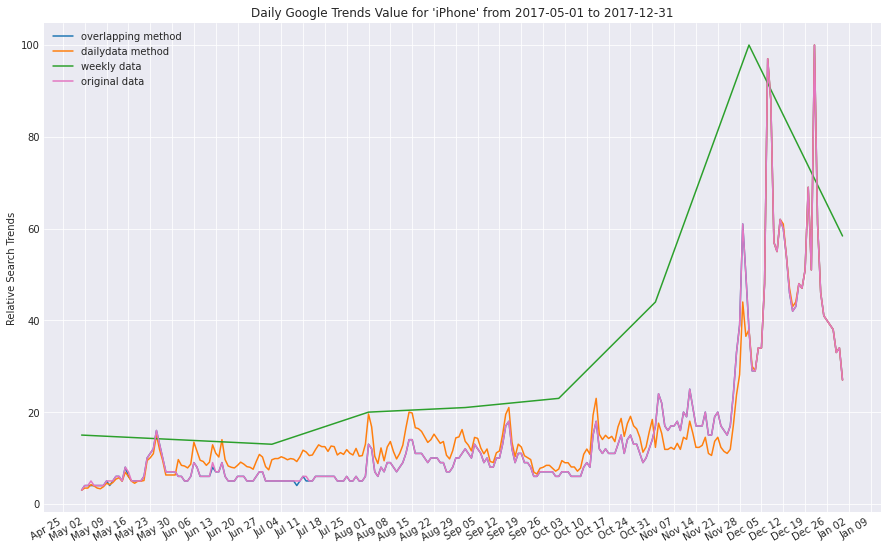

In [23]:
# combined_period.plot(figsize=(15,10))
combined2 = combined_period.copy()
combined2.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined2.index]
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2']
ax = combined2.plot(figsize=(15,10), color=c)
# set weekday locator
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=TU))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.ylabel('Relative Search Trends')
plt.xlabel(None)
plt.title('Daily Google Trends Value for \'iPhone\' from '+p_start+' to '+p_end)


plt.show()

In [24]:
begin = '2015-08-08'
finish = '2021-07-06'
combined_df = combined.loc[begin:finish]

In [25]:
combined_df = pd.DataFrame(combined_df['overlapping method'])

In [26]:
# Remove the # to download the data

#combined_df.to_csv('Bitcoin_daily.csv')

The daily trends for Cardano and Ethereum was collected in a similar method

The datasets are attached to the submission

# Pre Processing

The important steps involved:

* We checked for any null values in both the trends dataset and the Cryptocurrency dataset and found to have no null values. 
* We checked for outliers within the dataset and found that the data didn’t have any outliers. 
* The column ‘SNo’ is removed from the cryptocurrency dataset as it is just an identifier and does not have any meaningful insight. 
* The ‘Date’ column is transformed to Date-time field. 

Importing the necessary files.

These files are attached to the submission

The datasets after pre-processing are also attached to the submission

In [28]:
#Price data
Bitcoin_market = pd.read_csv("Bitcoin.csv")
Cardano_market = pd.read_csv("Cardano.csv")
Ethereum_market = pd.read_csv("Ethereum.csv")

#Trend Month data
Bitcoin_monthly = pd.read_csv("Bitcoin_monthly.csv")
Cardano_monthly = pd.read_csv("Cardano_monthly.csv")
Ethereum_monthly = pd.read_csv("Ethereum_monthly.csv")

#Trend Daily data
Bitcoin_daily = pd.read_csv("Bitcoin_daily.csv")
Cardano_daily = pd.read_csv("Cardano_daily.csv")
Ethereum_daily = pd.read_csv("Ethereum_daily.csv")

In [29]:
#Removing S.No.
Bitcoin_market = Bitcoin_market.drop(columns=['SNo'])
Cardano_market = Cardano_market.drop(columns=['SNo'])
Ethereum_market = Ethereum_market.drop(columns=['SNo'])

#Turning datetime data into same attribute name
Bitcoin_daily.rename(columns={"date":"Date"},inplace=True)
Cardano_daily.rename(columns={"date":"Date"},inplace=True)
Ethereum_daily.rename(columns={"date":"Date"},inplace=True)

#Renaming Attributes
Bitcoin_monthly.rename(columns={"Month":"Date"},inplace=True)
Cardano_monthly.rename(columns={"Month":"Date"},inplace=True)
Ethereum_monthly.rename(columns={"Month":"Date"},inplace=True)

Bitcoin_monthly.rename(columns={"Bitcoin: (United States)":"Trend"},inplace=True)
Cardano_monthly.rename(columns={"Cardano: (United States)":"Trend"},inplace=True)
Ethereum_monthly.rename(columns={"Ethereum: (United States)":"Trend"},inplace=True)

#Turning Date and month into timestamp
Bitcoin_market['Date'] = pd.to_datetime(Bitcoin_market['Date'])
Cardano_market['Date'] = pd.to_datetime(Cardano_market['Date'])
Ethereum_market['Date'] = pd.to_datetime(Ethereum_market['Date'])

Bitcoin_monthly['Date'] = pd.to_datetime(Bitcoin_monthly['Date'])
Cardano_monthly['Date'] = pd.to_datetime(Cardano_monthly['Date'])
Ethereum_monthly['Date'] = pd.to_datetime(Ethereum_monthly['Date'])

Bitcoin_daily['Date'] = pd.to_datetime(Bitcoin_daily['Date'])
Cardano_daily['Date'] = pd.to_datetime(Cardano_daily['Date'])
Ethereum_daily['Date'] = pd.to_datetime(Ethereum_daily['Date'])

#Creating Dataframes
df_monthly_bitcoin = pd.DataFrame()
df_monthly_bitcoin = Bitcoin_market.copy()
df_monthly_cardano = pd.DataFrame()
df_monthly_cardano = Cardano_market.copy()
df_monthly_ethereum = pd.DataFrame()
df_monthly_ethereum = Ethereum_market.copy()

df_daily_bitcoin = pd.DataFrame()
df_daily_cardano = pd.DataFrame()
df_daily_ethereum = pd.DataFrame()

Bitcoin_market_monthly = pd.DataFrame()
Cardano_market_monthly = pd.DataFrame()
Ethereum_market_monthly = pd.DataFrame()

Bitcoin_market_daily = pd.DataFrame()
Cardano_market_daily = pd.DataFrame()
Ethereum_market_daily = pd.DataFrame()

In [30]:
#Combining trend and marktet datasets

#Combining monthly dataset
df_monthly_bitcoin = Bitcoin_market.copy()
df_monthly_cardano = Cardano_market.copy()
df_monthly_ethereum = Ethereum_market.copy()

df_monthly_bitcoin['Date'] = pd.to_datetime(df_monthly_bitcoin['Date']).dt.to_period('M')
df_monthly_cardano['Date'] = pd.to_datetime(df_monthly_cardano['Date']).dt.to_period('M')
df_monthly_ethereum['Date'] = pd.to_datetime(df_monthly_ethereum['Date']).dt.to_period('M')

Bitcoin_monthly['Date'] = pd.to_datetime(Bitcoin_monthly['Date']).dt.to_period('M')
Cardano_monthly['Date'] = pd.to_datetime(Cardano_monthly['Date']).dt.to_period('M')
Ethereum_monthly['Date'] = pd.to_datetime(Ethereum_monthly['Date']).dt.to_period('M')

df_monthly_bitcoin = df_monthly_bitcoin.groupby(['Date']).sum().reset_index()
df_monthly_cardano = df_monthly_cardano.groupby(['Date']).sum().reset_index()
df_monthly_ethereum = df_monthly_ethereum.groupby(['Date']).sum().reset_index()

Bitcoin_market_monthly = df_monthly_bitcoin.merge(Bitcoin_monthly, on='Date')
Cardano_market_monthly = df_monthly_cardano.merge(Cardano_monthly, on='Date')
Ethereum_market_monthly = df_monthly_ethereum.merge(Ethereum_monthly, on='Date')

#Combining Daily dataset
df_daily_bitcoin = Bitcoin_market.copy()
df_daily_cardano = Cardano_market.copy()
df_daily_ethereum = Ethereum_market.copy()

df_daily_bitcoin['Date'] = df_daily_bitcoin['Date'].dt.date
df_daily_cardano['Date'] = df_daily_cardano['Date'].dt.date
df_daily_ethereum['Date'] = df_daily_ethereum['Date'].dt.date

df_daily_bitcoin['Date'] = pd.to_datetime(df_daily_bitcoin['Date'])
df_daily_cardano['Date'] = pd.to_datetime(df_daily_cardano['Date'])
df_daily_ethereum['Date'] = pd.to_datetime(df_daily_ethereum['Date'])

Bitcoin_market_daily = pd.merge(df_daily_bitcoin, Bitcoin_daily, on= 'Date')
Cardano_market_daily = pd.merge(df_daily_cardano, Cardano_daily, on= 'Date')
Ethereum_market_daily = pd.merge(df_daily_ethereum, Ethereum_daily, on= 'Date')

In [31]:
# Remove the # to download the data

#Saving the data
#Bitcoin_market_daily = Bitcoin_market_daily.to_csv('Bitcoin_Google_Trends.csv', index = False)
#Cardano_market_daily = Cardano_market_daily.to_csv('Cardano_Google_Trends.csv', index = False)
#Ethereum_market_daily = Ethereum_market_daily.to_csv('Ethereum_Google_Trends.csv', index = False)

#  Data Exploration

### Plotting Trends

Bitcoin Trends

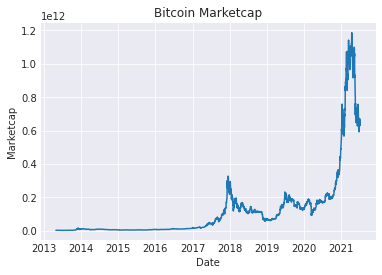

In [33]:
plt.plot(Bitcoin_market_daily['Date'],Bitcoin_market_daily['Marketcap'])
plt.title('Bitcoin Marketcap')
plt.xlabel('Date')
plt.ylabel('Marketcap')
plt.show()

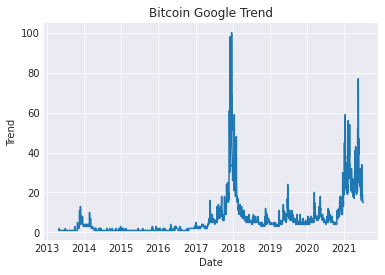

In [34]:
plt.plot(Bitcoin_market_daily['Date'],Bitcoin_market_daily['Trend'])
plt.title('Bitcoin Google Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.show()

Cardano Trends

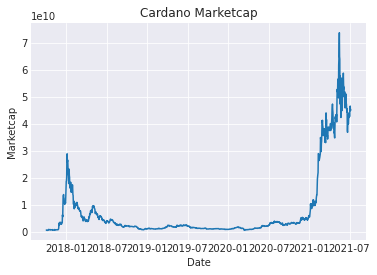

In [35]:
plt.plot(Cardano_market_daily['Date'],Cardano_market_daily['Marketcap'])
plt.title('Cardano Marketcap')
plt.xlabel('Date')
plt.ylabel('Marketcap')
plt.show()

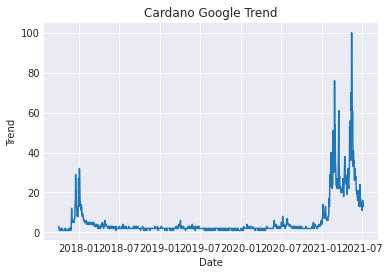

In [36]:
plt.plot(Cardano_market_daily['Date'],Cardano_market_daily['Trend'])
plt.title('Cardano Google Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.show()

Ethereum Trends

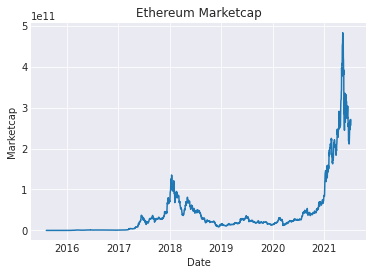

In [37]:
plt.plot(Ethereum_market_daily['Date'],Ethereum_market_daily['Marketcap'])
plt.title('Ethereum Marketcap')
plt.xlabel('Date')
plt.ylabel('Marketcap')
plt.show()

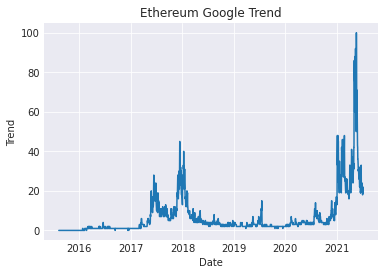

In [38]:
plt.plot(Ethereum_market_daily['Date'],Ethereum_market_daily['Trend'])
plt.title('Ethereum Google Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.show()

Observing the trends, we can see an interesting similarity across all the three crypto currencies between marketcap and google trends

### Plotting Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap for Bitcoin')

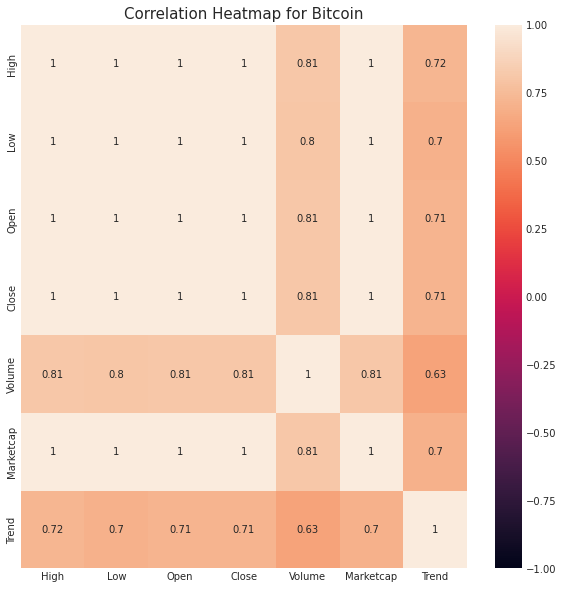

In [42]:
plt.figure(figsize=(10,10))
heatmap_bitcoin = sns.heatmap(Bitcoin_market_daily.corr(), vmin=-1, vmax=1, annot=True)
heatmap_bitcoin.set_title("Correlation Heatmap for Bitcoin", fontdict= {'fontsize': 15})

Text(0.5, 1.0, 'Correlation Heatmap for Cardano')

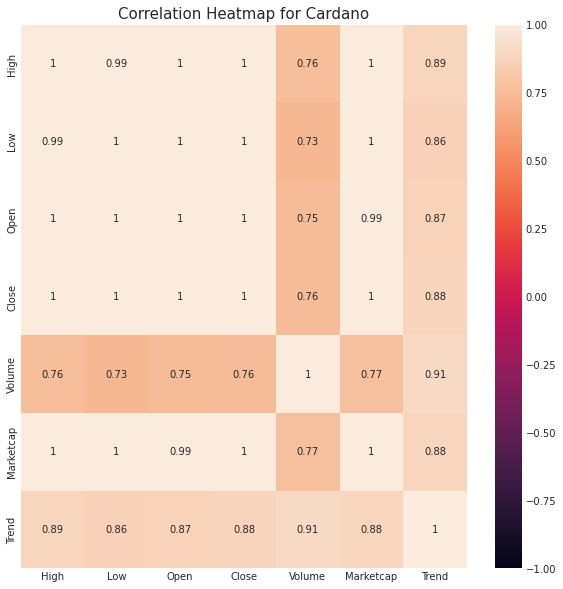

In [43]:
plt.figure(figsize=(10,10))
heatmap_cardano = sns.heatmap(Cardano_market_daily.corr(), vmin=-1, vmax=1, annot=True)
heatmap_cardano.set_title("Correlation Heatmap for Cardano", fontdict= {'fontsize': 15})

Text(0.5, 1.0, 'Correlation Heatmap for Ethereum')

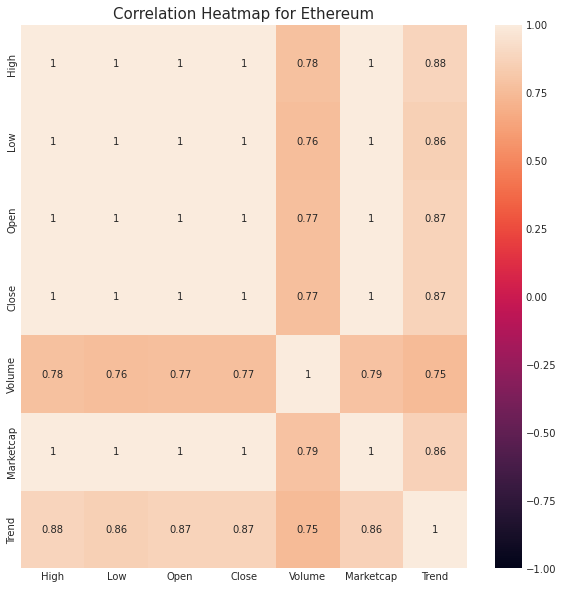

In [44]:
plt.figure(figsize=(10,10))
heatmap_ethereum = sns.heatmap(Ethereum_market_daily.corr(), vmin=-1, vmax=1, annot=True)
heatmap_ethereum.set_title("Correlation Heatmap for Ethereum", fontdict= {'fontsize': 15})

This shows that there might be a causal relationship between trends and the price of the currency which has to be explored.

# Modelling

* We first used Granger Causality Analysis to determine the causality effect on month level and day level data between Google trends and Cryptocurrency prices. 


* From this, we chose the best granularity level and checked their performances with three different models [ARIMA, XGBoost, LSTM]. 


* Since it’s a time series dataset the random split was ignored, and 2021 data is taken as test set and the rest is used for training.


* We propose two approaches, the first approach is to predict the daily price returns.The second approach is to forecast long and short options based on increase and decrease in the returns respectively.

### Modelling Methodology

**1. Granger Causal Analysis** 

* Granger causality analysis was undertaken to find the causal link between Trend and the prices of the crypto currencies.F statistics is used for the analysis.

* The Null hypothesis is that trend does not cause changes in prices (p > critical value) and the Alternative hypothesis is that trend does cause changes in prices (p < critical value). We took the critical value as 0.05 and did the analysis with both monthly and daily trends. 

**2. ARIMA**

* We used auto_arima function to determine the best (p, d, q) values for the ARIMA model and we use it to predict the price returns of the cryptocurrency for the year 2021 and forecast long and short options based on increase and decrease in the returns respectively.

**3. XGBoost** 

* We used XGBoost Regressor which is a boosting model to predict the price returns of the cryptocurrency for the year 2021, and XGBoost Classifier to forecast long and short options based on the increase or decrease in the returns, respectively.

**4. LSTM**

* We used Bidirectional LSTM, which uses neural network to understand the pattern within the data and remember the previous values during modelling, to forecast long and short options based on the increase or decrease in the returns, respectively. The activation function used was Relu and we used the Adam Optimizer.

# Granger Causality

## Monthly trends

### Bitcoin

Null hypothesis = Trend does not cause change in Market cap (p>0.05)

Alt hypothesis = Trend does cause change in Market cap (p<0.05)

critical value = 0.05

In [45]:
granger_bitcoin_monthly = grangercausalitytests(Bitcoin_market_monthly[['Trend', 'Marketcap']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5389  , p=0.0615  , df_denom=90, df_num=3
ssr based chi2 test:   chi2=8.2090  , p=0.0419  , df=3
likelihood ratio test: chi2=7.8800  , p=0.0486  , df=3
parameter F test:         F=2.5393  , p=0.0615  , df_denom=90, df_num=3


p value is greater than critical value, hence we fail to reject the null hypothesis.
So trends does not cause a change in market prices

### Cardano

Null hypothesis = Trend does not cause change in Market cap (p>0.05)

Alt hypothesis = Trend does cause change in Market cap (p<0.05)

critical value = 0.05

In [46]:
granger_cardano_monthly = grangercausalitytests(Cardano_market_monthly[['Trend', 'Marketcap']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=20.5439 , p=0.0000  , df_denom=36, df_num=3
ssr based chi2 test:   chi2=73.6156 , p=0.0000  , df=3
likelihood ratio test: chi2=42.9004 , p=0.0000  , df=3
parameter F test:         F=20.5438 , p=0.0000  , df_denom=36, df_num=3


p value is less than critical value, hence we can reject the null hypothesis.
So trends does cause a change in market prices

### Ethereum

Null hypothesis = Trend does not cause change in Market cap (p>0.05)

Alt hypothesis = Trend does cause change in Market cap (p<0.05)

critical value = 0.05

In [47]:
granger_ethereum_monthly = grangercausalitytests(Ethereum_market_monthly[['Trend', 'Marketcap']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3140  , p=0.8152  , df_denom=62, df_num=3
ssr based chi2 test:   chi2=1.0483  , p=0.7896  , df=3
likelihood ratio test: chi2=1.0405  , p=0.7915  , df=3
parameter F test:         F=0.3140  , p=0.8152  , df_denom=62, df_num=3


p value is greater than critical value, hence we fail to reject the null hypothesis.
So trends does not cause a change in market prices

#### We can see that we cannot seem to find any causality between trends and the market cap

#### We can increase the granularity of the Date and try it with daily data

## Daily trends

### Bitcoin

Null hypothesis = Trend does not cause change in Market cap (p>0.05)

Alt hypothesis = Trend does cause change in Market cap (p<0.05)

critical value = 0.05

In [48]:
granger_bitcoin_daily = grangercausalitytests(Bitcoin_market_daily[['Trend', 'Marketcap']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=15.6860 , p=0.0000  , df_denom=2981, df_num=3
ssr based chi2 test:   chi2=47.1686 , p=0.0000  , df=3
likelihood ratio test: chi2=46.8001 , p=0.0000  , df=3
parameter F test:         F=15.6857 , p=0.0000  , df_denom=2981, df_num=3


p value is less than critical value, hence we can reject the null hypothesis.
So trends does cause a change in market prices

### Cardano

Null hypothesis = Trend does not cause change in Market cap (p>0.05)

Alt hypothesis = Trend does cause change in Market cap (p<0.05)

critical value = 0.05

In [49]:
granger_cardano_daily = grangercausalitytests(Cardano_market_daily[['Trend', 'Marketcap']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=20.8304 , p=0.0000  , df_denom=1364, df_num=3
ssr based chi2 test:   chi2=62.8120 , p=0.0000  , df=3
likelihood ratio test: chi2=61.4156 , p=0.0000  , df=3
parameter F test:         F=20.8304 , p=0.0000  , df_denom=1364, df_num=3


p value is less than critical value, hence we can reject the null hypothesis.
So trends does cause a change in market prices

### Ethereum

Null hypothesis = Trend does not cause change in Market cap (p>0.05)

Alt hypothesis = Trend does cause change in Market cap (p<0.05)

critical value = 0.05

In [50]:
granger_ethereum_daily = grangercausalitytests(Ethereum_market_daily[['Trend', 'Marketcap']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=57.9056 , p=0.0000  , df_denom=2150, df_num=3
ssr based chi2 test:   chi2=174.2825, p=0.0000  , df=3
likelihood ratio test: chi2=167.5993, p=0.0000  , df=3
parameter F test:         F=57.9056 , p=0.0000  , df_denom=2150, df_num=3


p value is less than critical value, hence we can reject the null hypothesis.
So trends does cause a change in market prices

On the other hand, the analysis with daily trends, we rejected the null hypothesis in all three crypto currencies which tells us that there is causal relationship between Google trends and the prices. 

With that we decided to proceed with the daily trends data for our modelling.

# Model Fitting and Evaluavation

Defining necessary functions

In [53]:
#For finding the best fit for the arima model:
def bestfit(x):
    model_ = auto_arima(x, trace= True)
    model_.summary()

In [90]:
#For ARIMA Modelling:
def arima(x,y):
    model = sm.tsa.arima.ARIMA(x, order= y)
    model = model.fit()
    model.summary()
    predict = model.predict(start = len(train), end = len(train)+ len(test) - 1, typ = 'levels')
    return predict

In [55]:
#For Prediction plotting in arima
def pred_plot(x,y):
    x.plot()
    y.plot()

In [56]:
#For RMSE calculation
def rmse(x,y):
    rmse = sqrt(mean_squared_error(x,y))
    return rmse

In [97]:
#For MAPE calculation
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [158]:
#For binary prediction accuracy
def binary_pred_acc(x):
    pred = pd.DataFrame()
    pred['predict'] = x
    pred['close_binary'] = np.where(pred['predict']>x.mean(), 1, 0)
    acc = accuracy_score(df['close_binary'].iloc[-187:],pred['close_binary'])
    return acc

def binary_pred_acc1(x):
    pred = pd.DataFrame()
    pred['predict'] = x
    pred['close_binary'] = np.where(pred['predict']>x.mean(), 1, 0)
    acc = accuracy_score(df['close_binary'].iloc[-170:],pred['close_binary'])
    return acc


In [63]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

### Bitcoin

The pre-processed dataset for the modelling has been provided along with the submission

#### Close with stationary with lag window of 3 and 7

In [58]:
data = pd.read_csv('Bitcoin_Google_Trends.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [59]:
data['returns_close'] = ((data['Close'] - data['Close'].shift(1))/data['Close'])*100
data = data.dropna()
data['returns_trend'] = ((data['Trend'] - data['Trend'].shift(1))/data['Trend'])*100
data = data.dropna()
data['close_binary'] = np.where(data['returns_close']>0, 1, 0)

In [60]:
lag(data,'returns_close',[3,7])
data = data.dropna()
lag(data,'returns_trend',[3,7])
data = data.dropna()

In [61]:
data.columns

Index(['Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap', 'Trend', 'returns_close', 'returns_trend', 'close_binary',
       'returns_close_Window_3', 'returns_close_Window_7',
       'returns_trend_Window_3', 'returns_trend_Window_7'],
      dtype='object')

### LSTM

In [62]:
df = pd.DataFrame()
df[['close','trend','lag_close3','lag_close7','lag_trend3','lag_trend7']] = data[['returns_close','returns_trend','returns_close_Window_3','returns_close_Window_7','returns_trend_Window_3','returns_trend_Window_7']]

In [69]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_days = 3
n_features = 6
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)

(2974, 24)


C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var1(t)', ylabel='Density'>

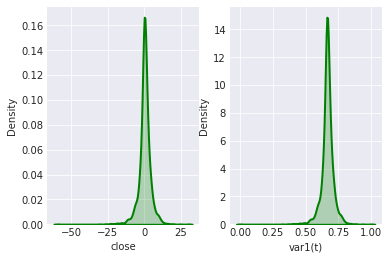

In [70]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
sns.distplot(df['close'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[0])
sns.distplot(reframed['var1(t)'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[1])

In [71]:
# split into train and test sets
values = reframed.values
n_train = 2787
train = values[:n_train, :]
test = values[n_train:, :]

In [72]:
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(2787, 18) 2787 (2787,)


In [73]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2787, 3, 6) (2787,) (187, 3, 6) (187,)


Epoch 1/50
88/88 - 5s - loss: 0.0560 - val_loss: 0.0046
Epoch 2/50
88/88 - 0s - loss: 0.0036 - val_loss: 0.0040
Epoch 3/50
88/88 - 0s - loss: 0.0029 - val_loss: 0.0032
Epoch 4/50
88/88 - 0s - loss: 0.0026 - val_loss: 0.0031
Epoch 5/50
88/88 - 0s - loss: 0.0025 - val_loss: 0.0031
Epoch 6/50
88/88 - 0s - loss: 0.0025 - val_loss: 0.0031
Epoch 7/50
88/88 - 0s - loss: 0.0025 - val_loss: 0.0030
Epoch 8/50
88/88 - 0s - loss: 0.0025 - val_loss: 0.0030
Epoch 9/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 10/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 11/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 12/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 13/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 14/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 15/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 16/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 17/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 18/50
88/88 - 0s - loss: 0.0024 - 

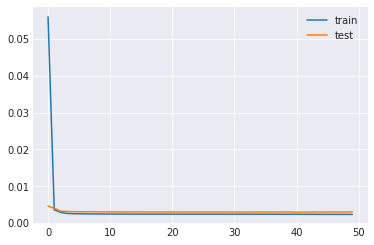

In [74]:
# design network
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [75]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [76]:
df_pred = pd.DataFrame()
df_pred['close'] = df['close'].iloc[-187:]
df_pred = df_pred.reset_index(drop=True)  
df_pred['Prediction_lstm'] = inv_yhat

### XGBoost

In [77]:
new_df = reframed.iloc[:,:-(n_features-1)]
new_df = new_df.rename(columns={'var1(t-3)': 'close(t-3)', 'var2(t-3)': 'trend(t-3)', 'var3(t-3)': 'lag_close3(t-3)', 
                        'var4(t-3)': 'lag_close7(t-3)', 'var5(t-3)': 'lag_trend3(t-3)','var4(t-3)': 'lag_trend7(t-3)',
                        'var1(t-2)': 'close(t-2)', 'var2(t-2)': 'trend(t-2)', 'var3(t-2)': 'lag_close3(t-2)', 
                        'var4(t-2)': 'lag_close7(t-2)', 'var5(t-2)': 'lag_trend3(t-2)','var6(t-2)': 'lag_trend7(t-2)',
                        'var1(t-1)': 'close(t-1)', 'var2(t-1)': 'trend(t-1)', 'var3(t-1)': 'lag_close3(t-1)', 
                        'var4(t-1)': 'lag_close7(t-1)', 'var5(t-1)': 'lag_trend3(t-1)', 
                        'var6(t-1)': 'lag_trend7(t-1)', 'var1(t)': 'close(t)'})
train = new_df.iloc[:2787,:]
test = new_df.iloc[2787:,:]
X_train = train.drop("close(t)", axis =1)
y_train = train['close(t)']
X_test = test.drop("close(t)", axis =1)
y_test = test['close(t)']

In [81]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

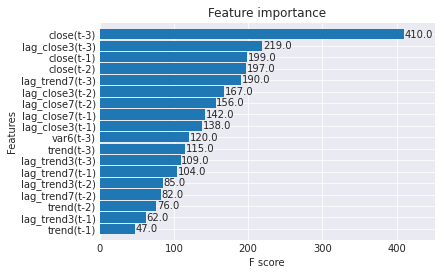

In [82]:
_ = plot_importance(reg, height=0.9)

In [83]:
Prediction_xgb = reg.predict(X_test)
Prediction_xgb = Prediction_xgb.reshape(-1,1)

In [84]:
inv_yhat = concatenate((Prediction_xgb, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [85]:
df_pred['Prediction_xgb'] = inv_yhat

### Arima

In [86]:
bestfit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-8994.128, Time=1.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9000.286, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8999.217, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-8999.203, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5646.170, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8997.218, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.393 seconds


In [91]:
Prediction_arima = arima(y_train,(0,0,0))
Prediction_arima = Prediction_arima.values.reshape(-1,1)

C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [92]:
inv_yhat = concatenate((Prediction_arima, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [93]:
df_pred['Prediction_arima'] = inv_yhat

In [94]:
#Ensemble
df_pred['Ensemble'] = (df_pred['Prediction_xgb']+df_pred['Prediction_arima']+df_pred['Prediction_lstm'])/3

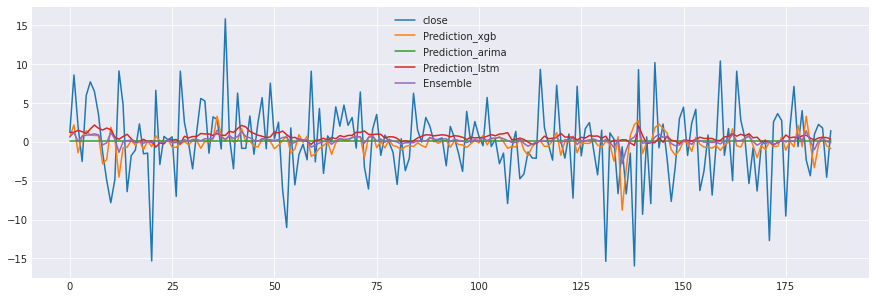

In [95]:
_ = df_pred[['close','Prediction_xgb','Prediction_arima','Prediction_lstm','Ensemble']].plot(figsize=(15, 5))

In [96]:
print('rmse for xgb: ',rmse(df_pred['Prediction_xgb'],df_pred['close']))
print('rmse for arima: ',rmse(df_pred['Prediction_arima'],df_pred['close']))
print('rmse for ensemble: ',rmse(df_pred['Ensemble'],df_pred['close']))
print('rmse for lstm: ',rmse(df_pred['Prediction_lstm'],df_pred['close']))

rmse for xgb:  4.967753096862368
rmse for arima:  4.857333041474308
rmse for ensemble:  4.857990643343139
rmse for lstm:  4.893392619190592


In [98]:
print('mape for xgb: ',mape(df_pred['close'], df_pred['Prediction_xgb']))
print('mape for arima: ',mape(df_pred['close'], df_pred['Prediction_arima']))
print('mape for ensemble: ',mape(df_pred['close'], df_pred['Ensemble']))
print('mape for lstm: ',mape(df_pred['close'], df_pred['Prediction_lstm']))

mape for xgb:  219.4971757926257
mape for arima:  132.81402486609716
mape for ensemble:  211.98216184216653
mape for lstm:  344.82784141847424


#### Long and short with Lag of 3 and 7

### LSTM

In [99]:
df = pd.DataFrame()
df[['close_binary','trend','lag_close3','lag_close7','lag_trend3','lag_trend7']] = data[['close_binary','returns_trend','returns_close_Window_3','returns_close_Window_7','returns_trend_Window_3','returns_trend_Window_7']]

In [100]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_days = 3
n_features = 6
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)

(2974, 24)


C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var1(t)', ylabel='Density'>

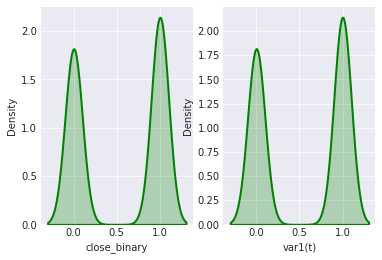

In [101]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
sns.distplot(df['close_binary'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[0])
sns.distplot(reframed['var1(t)'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[1])

In [102]:
# split into train and test sets
values = reframed.values
n_train = 2787
train = values[:n_train, :]
test = values[n_train:, :]

In [103]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2787, 3, 6) (2787,) (187, 3, 6) (187, 1)


Epoch 1/50
88/88 - 5s - loss: 0.0671 - val_loss: 0.0041
Epoch 2/50
88/88 - 0s - loss: 0.0032 - val_loss: 0.0035
Epoch 3/50
88/88 - 0s - loss: 0.0027 - val_loss: 0.0032
Epoch 4/50
88/88 - 0s - loss: 0.0026 - val_loss: 0.0032
Epoch 5/50
88/88 - 0s - loss: 0.0025 - val_loss: 0.0032
Epoch 6/50
88/88 - 0s - loss: 0.0025 - val_loss: 0.0032
Epoch 7/50
88/88 - 0s - loss: 0.0025 - val_loss: 0.0032
Epoch 8/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0031
Epoch 9/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0031
Epoch 10/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0031
Epoch 11/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0031
Epoch 12/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0031
Epoch 13/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0031
Epoch 14/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0031
Epoch 15/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0031
Epoch 16/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 17/50
88/88 - 0s - loss: 0.0024 - val_loss: 0.0030
Epoch 18/50
88/88 - 0s - loss: 0.0024 - 

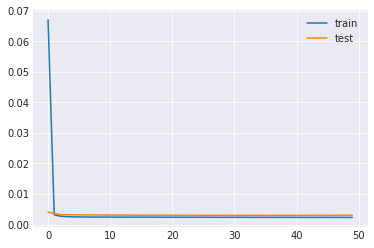

In [104]:
# design network
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [105]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [106]:
inv_yhat = concatenate((Prediction_xgb, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [107]:
binary_pred_acc(inv_yhat)

0.5187165775401069

### XGBoost

In [108]:
new_df = reframed.iloc[:,:-(n_features-1)]
new_df = new_df.rename(columns={'var1(t-3)': 'close(t-3)', 'var2(t-3)': 'trend(t-3)', 'var3(t-3)': 'lag_close3(t-3)', 
                        'var4(t-3)': 'lag_close7(t-3)', 'var5(t-3)': 'lag_trend3(t-3)','var4(t-3)': 'lag_trend7(t-3)',
                        'var1(t-2)': 'close(t-2)', 'var2(t-2)': 'trend(t-2)', 'var3(t-2)': 'lag_close3(t-2)', 
                        'var4(t-2)': 'lag_close7(t-2)', 'var5(t-2)': 'lag_trend3(t-2)','var6(t-2)': 'lag_trend7(t-2)',
                        'var1(t-1)': 'close(t-1)', 'var2(t-1)': 'trend(t-1)', 'var3(t-1)': 'lag_close3(t-1)', 
                        'var4(t-1)': 'lag_close7(t-1)', 'var5(t-1)': 'lag_trend3(t-1)', 
                        'var6(t-1)': 'lag_trend7(t-1)', 'var1(t)': 'close(t)'})
train = new_df.iloc[:2787,:]
test = new_df.iloc[2787:,:]
X_train = train.drop("close(t)", axis =1)
y_train = train['close(t)']
X_test = test.drop("close(t)", axis =1)
y_test = test['close(t)']

In [109]:
reg = xgb.XGBClassifier(n_estimators=1000)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

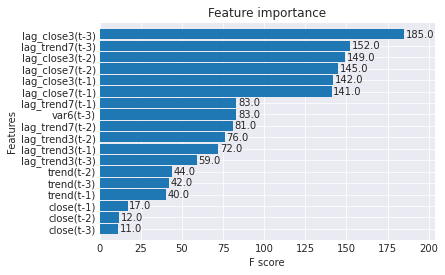

In [110]:
_ = plot_importance(reg, height=0.9)

In [111]:
Prediction_xgb = reg.predict(X_test)
Prediction_xgb = Prediction_xgb.reshape(-1,1)
inv_yhat = concatenate((Prediction_xgb, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [112]:
binary_pred_acc(inv_yhat)

0.48128342245989303

### ARIMA

In [113]:
bestfit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4030.686, Time=2.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4028.643, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4027.646, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4027.584, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6210.506, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4029.472, Time=0.51 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4029.362, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4031.240, Time=1.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5690.198, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 5.033 seconds


In [114]:
Prediction_arima = arima(y_train,(0,0,1))
Prediction_arima = Prediction_arima.values.reshape(-1,1)

C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [115]:
inv_yhat = concatenate((Prediction_arima, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [116]:
binary_pred_acc(inv_yhat)

0.5026737967914439

### Cardano

The pre-processed dataset for the modelling has been provided along with the submission

#### Close with stationary with lag window of 3 and 7

In [117]:
data = pd.read_csv('Cardano_Google_Trends.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [118]:
data['returns_close'] = ((data['Close'] - data['Close'].shift(1))/data['Close'])*100
data = data.dropna()
data['returns_trend'] = ((data['Trend'] - data['Trend'].shift(1))/data['Trend'])*100
data = data.dropna()
data['close_binary'] = np.where(data['returns_close']>0, 1, 0)

In [119]:
lag(data,'returns_close',[3,7])
data = data.dropna()
lag(data,'returns_trend',[3,7])
data = data.dropna()

In [120]:
data.columns

Index(['Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap', 'Trend', 'returns_close', 'returns_trend', 'close_binary',
       'returns_close_Window_3', 'returns_close_Window_7',
       'returns_trend_Window_3', 'returns_trend_Window_7'],
      dtype='object')

### LSTM

In [121]:
df = pd.DataFrame()
df[['close','trend','lag_close3','lag_close7','lag_trend3','lag_trend7']] = data[['returns_close','returns_trend','returns_close_Window_3','returns_close_Window_7','returns_trend_Window_3','returns_trend_Window_7']]

In [122]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_days = 3
n_features = 6
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)

(1357, 24)


C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var1(t)', ylabel='Density'>

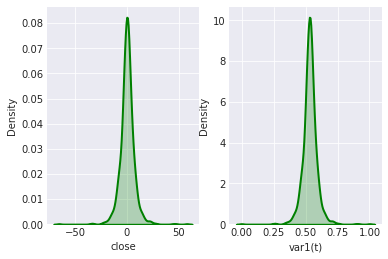

In [123]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
sns.distplot(df['close'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[0])
sns.distplot(reframed['var1(t)'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[1])

In [124]:
# split into train and test sets
values = reframed.values
n_train = 1187
train = values[:n_train, :]
test = values[n_train:, :]

In [125]:
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(1187, 18) 1187 (1187,)


In [126]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1187, 3, 6) (1187,) (170, 3, 6) (170,)


Epoch 1/50
38/38 - 5s - loss: 0.0798 - val_loss: 0.0081
Epoch 2/50
38/38 - 0s - loss: 0.0056 - val_loss: 0.0055
Epoch 3/50
38/38 - 0s - loss: 0.0044 - val_loss: 0.0052
Epoch 4/50
38/38 - 0s - loss: 0.0041 - val_loss: 0.0049
Epoch 5/50
38/38 - 0s - loss: 0.0038 - val_loss: 0.0047
Epoch 6/50
38/38 - 0s - loss: 0.0037 - val_loss: 0.0045
Epoch 7/50
38/38 - 0s - loss: 0.0035 - val_loss: 0.0043
Epoch 8/50
38/38 - 0s - loss: 0.0035 - val_loss: 0.0043
Epoch 9/50
38/38 - 0s - loss: 0.0034 - val_loss: 0.0043
Epoch 10/50
38/38 - 0s - loss: 0.0034 - val_loss: 0.0042
Epoch 11/50
38/38 - 0s - loss: 0.0034 - val_loss: 0.0042
Epoch 12/50
38/38 - 0s - loss: 0.0034 - val_loss: 0.0042
Epoch 13/50
38/38 - 0s - loss: 0.0034 - val_loss: 0.0042
Epoch 14/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0042
Epoch 15/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0042
Epoch 16/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0042
Epoch 17/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0042
Epoch 18/50
38/38 - 0s - loss: 0.0033 - 

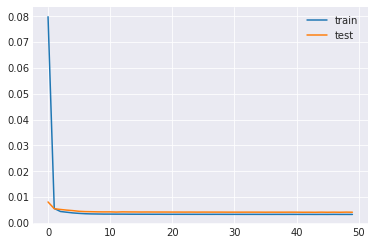

In [127]:
# design network
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [128]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [130]:
df_pred = pd.DataFrame()
df_pred['close'] = df['close'].iloc[-170:]
df_pred = df_pred.reset_index(drop=True)  
df_pred['Prediction_lstm'] = inv_yhat

### XGBoost

In [131]:
new_df = reframed.iloc[:,:-(n_features-1)]
new_df = new_df.rename(columns={'var1(t-3)': 'close(t-3)', 'var2(t-3)': 'trend(t-3)', 'var3(t-3)': 'lag_close3(t-3)', 
                        'var4(t-3)': 'lag_close7(t-3)', 'var5(t-3)': 'lag_trend3(t-3)','var4(t-3)': 'lag_trend7(t-3)',
                        'var1(t-2)': 'close(t-2)', 'var2(t-2)': 'trend(t-2)', 'var3(t-2)': 'lag_close3(t-2)', 
                        'var4(t-2)': 'lag_close7(t-2)', 'var5(t-2)': 'lag_trend3(t-2)','var6(t-2)': 'lag_trend7(t-2)',
                        'var1(t-1)': 'close(t-1)', 'var2(t-1)': 'trend(t-1)', 'var3(t-1)': 'lag_close3(t-1)', 
                        'var4(t-1)': 'lag_close7(t-1)', 'var5(t-1)': 'lag_trend3(t-1)', 
                        'var6(t-1)': 'lag_trend7(t-1)', 'var1(t)': 'close(t)'})
train = new_df.iloc[:1187,:]
test = new_df.iloc[1187:,:]
X_train = train.drop("close(t)", axis =1)
y_train = train['close(t)']
X_test = test.drop("close(t)", axis =1)
y_test = test['close(t)']

In [132]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

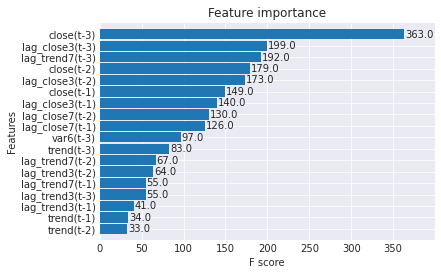

In [133]:
_ = plot_importance(reg, height=0.9)

In [134]:
Prediction_xgb = reg.predict(X_test)
Prediction_xgb = Prediction_xgb.reshape(-1,1)

In [135]:
inv_yhat = concatenate((Prediction_xgb, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [136]:
df_pred['Prediction_xgb'] = inv_yhat

### Arima

In [137]:
bestfit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3453.816, Time=1.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3442.203, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3441.075, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3440.918, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1881.593, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-3456.590, Time=0.99 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3453.166, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3438.306, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-3454.532, Time=1.29 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-3454.347, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3456.024, Time=0.93 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-3452.667, Time=1.37 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3414.458, Time=0.26 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 8.111 seconds


In [138]:
Prediction_arima = arima(y_train,(0,0,0))
Prediction_arima = Prediction_arima.values.reshape(-1,1)

C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [139]:
inv_yhat = concatenate((Prediction_arima, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [140]:
df_pred['Prediction_arima'] = inv_yhat

In [141]:
#Ensemble
df_pred['Ensemble'] = (df_pred['Prediction_xgb']+df_pred['Prediction_arima']+df_pred['Prediction_lstm'])/3

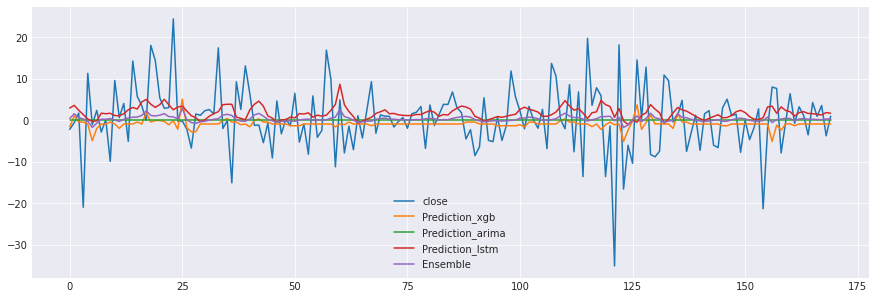

In [142]:
_ = df_pred[['close','Prediction_xgb','Prediction_arima','Prediction_lstm','Ensemble']].plot(figsize=(15, 5))

In [143]:
print('rmse for xgb: ',rmse(df_pred['Prediction_xgb'],df_pred['close']))
print('rmse for arima: ',rmse(df_pred['Prediction_arima'],df_pred['close']))
print('rmse for ensemble: ',rmse(df_pred['Ensemble'],df_pred['close']))
print('rmse for lstm: ',rmse(df_pred['Prediction_lstm'],df_pred['close']))

rmse for xgb:  7.822914536922903
rmse for arima:  7.737631016681096
rmse for ensemble:  7.704636927365667
rmse for lstm:  7.901753368171456


In [144]:
print('mape for xgb: ',mape(df_pred['close'], df_pred['Prediction_xgb']))
print('mape for arima: ',mape(df_pred['close'], df_pred['Prediction_arima']))
print('mape for ensemble: ',mape(df_pred['close'], df_pred['Ensemble']))
print('mape for lstm: ',mape(df_pred['close'], df_pred['Prediction_lstm']))

mape for xgb:  184.8898749491704
mape for arima:  99.99964993758
mape for ensemble:  150.32420843810416
mape for lstm:  277.0673427077217


#### Long and short with Lag of 3 and 7

### LSTM

In [145]:
df = pd.DataFrame()
df[['close_binary','trend','lag_close3','lag_close7','lag_trend3','lag_trend7']] = data[['close_binary','returns_trend','returns_close_Window_3','returns_close_Window_7','returns_trend_Window_3','returns_trend_Window_7']]

In [146]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_days = 3
n_features = 6
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)

(1357, 24)


C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var1(t)', ylabel='Density'>

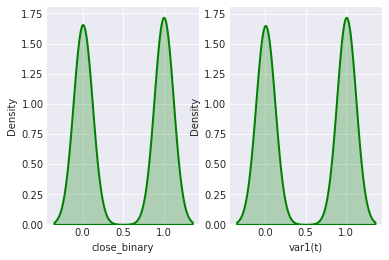

In [147]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
sns.distplot(df['close_binary'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[0])
sns.distplot(reframed['var1(t)'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[1])

In [148]:
# split into train and test sets
values = reframed.values
n_train = 1187
train = values[:n_train, :]
test = values[n_train:, :]

In [149]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1187, 3, 6) (1187,) (170, 3, 6) (170, 1)


Epoch 1/50
38/38 - 5s - loss: 0.0752 - val_loss: 0.0089
Epoch 2/50
38/38 - 0s - loss: 0.0057 - val_loss: 0.0054
Epoch 3/50
38/38 - 0s - loss: 0.0043 - val_loss: 0.0052
Epoch 4/50
38/38 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 5/50
38/38 - 0s - loss: 0.0037 - val_loss: 0.0048
Epoch 6/50
38/38 - 0s - loss: 0.0035 - val_loss: 0.0046
Epoch 7/50
38/38 - 0s - loss: 0.0035 - val_loss: 0.0045
Epoch 8/50
38/38 - 0s - loss: 0.0034 - val_loss: 0.0044
Epoch 9/50
38/38 - 0s - loss: 0.0034 - val_loss: 0.0044
Epoch 10/50
38/38 - 0s - loss: 0.0034 - val_loss: 0.0043
Epoch 11/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0043
Epoch 12/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0043
Epoch 13/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0043
Epoch 14/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0043
Epoch 15/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0042
Epoch 16/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0042
Epoch 17/50
38/38 - 0s - loss: 0.0033 - val_loss: 0.0042
Epoch 18/50
38/38 - 0s - loss: 0.0033 - 

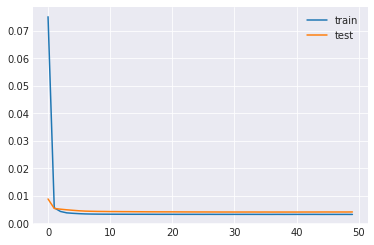

In [150]:
# design network
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [151]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [152]:
inv_yhat = concatenate((Prediction_xgb, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [159]:
binary_pred_acc1(inv_yhat)

0.4235294117647059

### XGBoost

In [160]:
new_df = reframed.iloc[:,:-(n_features-1)]
new_df = new_df.rename(columns={'var1(t-3)': 'close(t-3)', 'var2(t-3)': 'trend(t-3)', 'var3(t-3)': 'lag_close3(t-3)', 
                        'var4(t-3)': 'lag_close7(t-3)', 'var5(t-3)': 'lag_trend3(t-3)','var4(t-3)': 'lag_trend7(t-3)',
                        'var1(t-2)': 'close(t-2)', 'var2(t-2)': 'trend(t-2)', 'var3(t-2)': 'lag_close3(t-2)', 
                        'var4(t-2)': 'lag_close7(t-2)', 'var5(t-2)': 'lag_trend3(t-2)','var6(t-2)': 'lag_trend7(t-2)',
                        'var1(t-1)': 'close(t-1)', 'var2(t-1)': 'trend(t-1)', 'var3(t-1)': 'lag_close3(t-1)', 
                        'var4(t-1)': 'lag_close7(t-1)', 'var5(t-1)': 'lag_trend3(t-1)', 
                        'var6(t-1)': 'lag_trend7(t-1)', 'var1(t)': 'close(t)'})
train = new_df.iloc[:1187,:]
test = new_df.iloc[1187:,:]
X_train = train.drop("close(t)", axis =1)
y_train = train['close(t)']
X_test = test.drop("close(t)", axis =1)
y_test = test['close(t)']

In [161]:
reg = xgb.XGBClassifier(n_estimators=1000)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

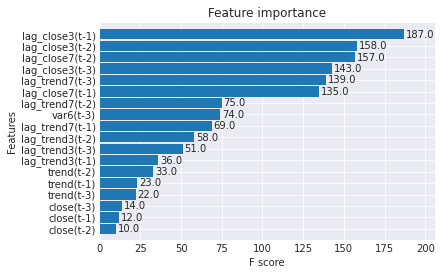

In [162]:
_ = plot_importance(reg, height=0.9)

In [163]:
Prediction_xgb = reg.predict(X_test)
Prediction_xgb = Prediction_xgb.reshape(-1,1)
inv_yhat = concatenate((Prediction_xgb, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [165]:
binary_pred_acc1(inv_yhat)

0.48823529411764705

### ARIMA

In [166]:
bestfit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2619.433, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2207.721, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2617.433, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2066.478, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1988.084, Time=0.31 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1925.480, Time=0.23 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1915.167, Time=0.31 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1913.167, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1923.480, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=0.63 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=0.45 s

In [167]:
Prediction_arima = arima(y_train,(5,1,0))
Prediction_arima = Prediction_arima.values.reshape(-1,1)

C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashwa\Anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [168]:
inv_yhat = concatenate((Prediction_arima, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [169]:
binary_pred_acc1(inv_yhat)

0.5352941176470588

### Ethereum

The pre-processed dataset for the modelling has been provided along with the submission

#### Close with stationary with lag window of 3 and 7

In [ ]:
data = pd.read_csv('Ethereum_Google_Trends.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['returns_close'] = ((data['Close'] - data['Close'].shift(1))/data['Close'])*100
data = data.dropna()
data['returns_trend'] = ((data['Trend'] - data['Trend'].shift(1))/data['Trend'])*100
data = data.dropna()
data['close_binary'] = np.where(data['returns_close']>0, 1, 0)

In [ ]:
lag(data,'returns_close',[3,7])
data = data.dropna()
lag(data,'returns_trend',[3,7])
data = data.dropna()

In [ ]:
data.columns

### LSTM

In [ ]:
df = pd.DataFrame()
df[['close','trend','lag_close3','lag_close7','lag_trend3','lag_trend7']] = data[['returns_close','returns_trend','returns_close_Window_3','returns_close_Window_7','returns_trend_Window_3','returns_trend_Window_7']]

In [ ]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_days = 3
n_features = 6
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)

In [ ]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
sns.distplot(df['close'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[0])
sns.distplot(reframed['var1(t)'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[1])

In [ ]:
# split into train and test sets
values = reframed.values
n_train = 1750
train = values[:n_train, :]
test = values[n_train:, :]

In [ ]:
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
# design network
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
df_pred = pd.DataFrame()
df_pred['close'] = df['close'].iloc[-187:]
df_pred = df_pred.reset_index(drop=True)  
df_pred['Prediction_lstm'] = inv_yhat

### XGBoost

In [ ]:
new_df = reframed.iloc[:,:-(n_features-1)]
new_df = new_df.rename(columns={'var1(t-2)': 'close(t-2)', 'var2(t-2)': 'trend(t-2)', 'var3(t-2)': 'lag_close3(t-2)', 
                                'var4(t-2)': 'lag_close7(t-2)', 'var5(t-2)': 'lag_trend3(t-2)','var6(t-2)': 'lag_trend7(t-2)',
                                'var1(t-1)': 'close(t-1)', 'var2(t-1)': 'trend(t-1)', 'var3(t-1)': 'lag_close3(t-1)', 
                                'var4(t-1)': 'lag_close7(t-1)', 'var5(t-1)': 'lag_trend3(t-1)', 
                                'var6(t-1)': 'lag_trend7(t-1)', 'var1(t)': 'close(t)'})
train = new_df.iloc[:1750,:]
test = new_df.iloc[1750:,:]
X_train = train.drop("close(t)", axis =1)
y_train = train['close(t)']
X_test = test.drop("close(t)", axis =1)
y_test = test['close(t)']

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

In [ ]:
_ = plot_importance(reg, height=0.9)

In [46]:
Prediction_xgb = reg.predict(X_test)

In [47]:
Prediction_xgb = Prediction_xgb.reshape(-1,1)

In [48]:
inv_yhat = concatenate((Prediction_xgb, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [49]:
df_pred['Prediction_xgb'] = inv_yhat

### ARIMA

In [50]:
bestfit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4895.547, Time=5.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4900.509, Time=0.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4899.192, Time=1.43 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4899.144, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3952.907, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4897.021, Time=2.40 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 10.675 seconds


In [51]:
Prediction_arima = arima(y_train,(0,0,0))
Prediction_arima = Prediction_arima.values.reshape(-1,1)

C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [52]:
inv_yhat = concatenate((Prediction_arima, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [53]:
df_pred['Prediction_arima'] = inv_yhat

In [66]:
df_pred['Ensemble'] = (df_pred['Prediction_xgb']+df_pred['Prediction_arima']+df_pred['Prediction_lstm'])/3

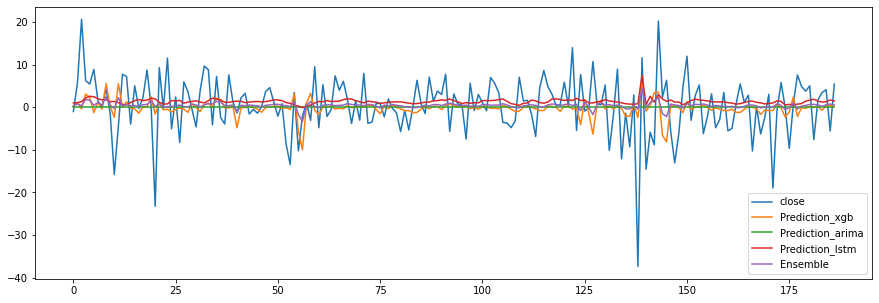

In [67]:
_ = df_pred[['close','Prediction_xgb','Prediction_arima','Prediction_lstm','Ensemble']].plot(figsize=(15, 5))

In [68]:
print('rmse for xgb: ',rmse(df_pred['Prediction_xgb'],df_pred['close']))
print('rmse for arima: ',rmse(df_pred['Prediction_arima'],df_pred['close']))
print('rmse for ensemble: ',rmse(df_pred['Ensemble'],df_pred['close']))
print('rmse for lstm: ',rmse(df_pred['Prediction_lstm'],df_pred['close']))

rmse for xgb:  6.864046491584547
rmse for arima:  6.835780910864449
rmse for ensemble:  6.75723765485368
rmse for lstm:  6.82445694260986


In [69]:
print('mape for xgb: ',mape(df_pred['close'], df_pred['Prediction_xgb']))
print('mape for arima: ',mape(df_pred['close'], df_pred['Prediction_arima']))
print('mape for ensemble: ',mape(df_pred['close'], df_pred['Ensemble']))
print('mape for lstm: ',mape(df_pred['close'], df_pred['Prediction_lstm']))

mape for xgb:  152.1383760245694
mape for arima:  100.08865947263807
mape for ensemble:  107.42581912127436
mape for lstm:  144.7754967776893


Increasing the lag window does not seem to change the result, persuing this method does not seem to work

#### Long and short with no lag

### LSTM

In [ ]:
df = pd.DataFrame()
df[['close_binary','trend','lag_close3','lag_close7','lag_trend3','lag_trend7']] = data[['close_binary','returns_trend','returns_close_Window_3','returns_close_Window_7','returns_trend_Window_3','returns_trend_Window_7']]

In [ ]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_days = 3
n_features = 6
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
print(reframed.shape)

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var1(t)', ylabel='Density'>

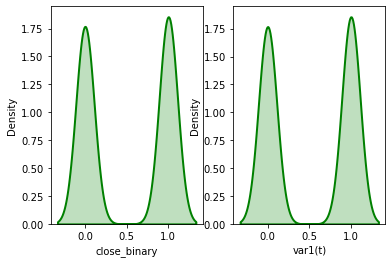

In [204]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
sns.distplot(df['close_binary'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[0])
sns.distplot(reframed['var1(t)'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax=ax[1])

In [206]:
# split into train and test sets
values = reframed.values
n_train = 1750
train = values[:n_train, :]
test = values[n_train:, :]

In [207]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1750, 3, 6) (1750,) (187, 3, 6) (187, 1)


Epoch 1/50
55/55 - 10s - loss: 0.1374 - val_loss: 0.0068 - 10s/epoch - 179ms/step
Epoch 2/50
55/55 - 1s - loss: 0.0052 - val_loss: 0.0064 - 567ms/epoch - 10ms/step
Epoch 3/50
55/55 - 1s - loss: 0.0047 - val_loss: 0.0061 - 572ms/epoch - 10ms/step
Epoch 4/50
55/55 - 1s - loss: 0.0043 - val_loss: 0.0054 - 570ms/epoch - 10ms/step
Epoch 5/50
55/55 - 1s - loss: 0.0041 - val_loss: 0.0052 - 580ms/epoch - 11ms/step
Epoch 6/50
55/55 - 1s - loss: 0.0040 - val_loss: 0.0051 - 558ms/epoch - 10ms/step
Epoch 7/50
55/55 - 1s - loss: 0.0039 - val_loss: 0.0051 - 563ms/epoch - 10ms/step
Epoch 8/50
55/55 - 1s - loss: 0.0038 - val_loss: 0.0050 - 575ms/epoch - 10ms/step
Epoch 9/50
55/55 - 1s - loss: 0.0038 - val_loss: 0.0050 - 573ms/epoch - 10ms/step
Epoch 10/50
55/55 - 1s - loss: 0.0038 - val_loss: 0.0050 - 561ms/epoch - 10ms/step
Epoch 11/50
55/55 - 1s - loss: 0.0038 - val_loss: 0.0050 - 567ms/epoch - 10ms/step
Epoch 12/50
55/55 - 1s - loss: 0.0038 - val_loss: 0.0049 - 565ms/epoch - 10ms/step
Epoch 13/50
5

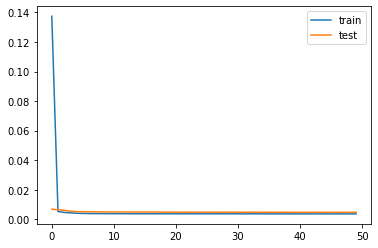

In [208]:
# design network
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [209]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [210]:
inv_yhat = concatenate((Prediction_xgb, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [211]:
binary_pred_acc(inv_yhat)

0.49732620320855614

### XGBoost

In [212]:
new_df = reframed.iloc[:,:-(n_features-1)]
new_df = new_df.rename(columns={'var1(t-3)': 'close(t-3)', 'var2(t-3)': 'trend(t-3)', 'var3(t-3)': 'lag_close3(t-3)', 
                        'var4(t-3)': 'lag_close7(t-3)', 'var5(t-3)': 'lag_trend3(t-3)','var4(t-3)': 'lag_trend7(t-3)',
                        'var1(t-2)': 'close(t-2)', 'var2(t-2)': 'trend(t-2)', 'var3(t-2)': 'lag_close3(t-2)', 
                        'var4(t-2)': 'lag_close7(t-2)', 'var5(t-2)': 'lag_trend3(t-2)','var6(t-2)': 'lag_trend7(t-2)',
                        'var1(t-1)': 'close(t-1)', 'var2(t-1)': 'trend(t-1)', 'var3(t-1)': 'lag_close3(t-1)', 
                        'var4(t-1)': 'lag_close7(t-1)', 'var5(t-1)': 'lag_trend3(t-1)', 
                        'var6(t-1)': 'lag_trend7(t-1)', 'var1(t)': 'close(t)'})
train = new_df.iloc[:1750,:]
test = new_df.iloc[1750:,:]
X_train = train.drop("close(t)", axis =1)
y_train = train['close(t)']
X_test = test.drop("close(t)", axis =1)
y_test = test['close(t)']

In [213]:
reg = xgb.XGBClassifier(n_estimators=1000)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

C:\Users\rohit\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

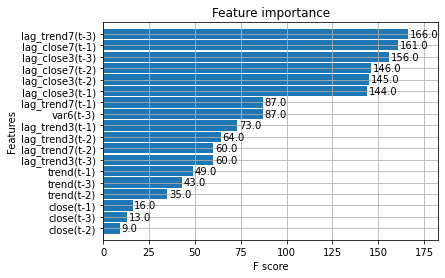

In [214]:
_ = plot_importance(reg, height=0.9)

In [215]:
Prediction_xgb = reg.predict(X_test)
Prediction_xgb = Prediction_xgb.reshape(-1,1)
inv_yhat = concatenate((Prediction_xgb, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [216]:
binary_pred_acc(inv_yhat)

0.47058823529411764

### ARIMA

In [226]:
bestfit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2538.898, Time=5.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2543.993, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2536.994, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2537.266, Time=1.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3777.140, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2538.744, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2538.808, Time=1.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2535.836, Time=4.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2537.233, Time=5.36 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2535.565, Time=4.71 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2538.649, Time=0.80 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2537.175, Time=5.37 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2540.192, Time=0.77 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2539.288, Time=5.94 sec
 ARIMA(1,0,2)(0,0,0)[0]          

In [227]:
Prediction_arima = arima(y_train,(1,0,2))
Prediction_arima = Prediction_arima.values.reshape(-1,1)

C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [224]:
inv_yhat = concatenate((Prediction_arima, test_X[:, -(n_features-1):]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [225]:
binary_pred_acc(inv_yhat)

0.42780748663101603

# Results

**1. Close Price prediction**

* **Bitcoin:**

    **RMSE Values:** 

        rmse for xgb:  4.967753096862368
        rmse for arima:  4.857333041474308
        rmse for ensemble:  4.857990643343139
        rmse for lstm:  4.893392619190592

    **MAPE Value:**

        mape for xgb:  219.4971757926257
        mape for arima:  132.81402486609716
        mape for ensemble:  211.98216184216653
        mape for lstm:  344.82784141847424

* **Cardano**

    **RMSE Values:**
    
        rmse for xgb:  7.822914536922903
        rmse for arima:  7.737631016681096
        rmse for ensemble:  7.704636927365667
        rmse for lstm:  7.901753368171456
    
    **MAPE Values:**
    
        mape for xgb:  184.8898749491704
        mape for arima:  99.99964993758
        mape for ensemble:  150.32420843810416
        mape for lstm:  277.0673427077217
        
* **Ethereum**

    **RMSE Values:**
    
        rmse for xgb:  6.864046491584547
        rmse for arima:  6.835780910864449
        rmse for ensemble:  6.75723765485368
        rmse for lstm:  6.82445694260986

    **MAPE Values:**
    
        mape for xgb:  152.1383760245694
        mape for arima:  100.08865947263807
        mape for ensemble:  107.42581912127436
        mape for lstm:  144.7754967776893
  
**2. Long-Short Option Forecasting**

* **ARIMA:**
    
    50.27% for Bitcoin, 53.53% for Cardano and 42.78% for Ethereum
    
* **XGBoost:**
    
    48.13% for Bitcoin, 48.83% for Cardano and 47.06% for Ethereum
    
* **LSTM:**
    
    48.13% for Bitcoin, 53.53% for Cardano and 49.73% for Ethereum

# Issues and Improvements

### Issues

1. Scrapping Google trends data at day level granularity wasn't possible and had to perform transformation on the obtained data.

### Improvements

1. Though failing to predict the price returns with high accuracy, because of reasons like covid impact on the market (which made the stock market extremely volatile) and lacking in perfectly understanding the mood of the public, as all those who search about cryptocurrency on google don’t always buy a cryptocurrency. 


2. The surge in usage of social media platforms recently has effect on our predictions too. But the approach of predicting the positive and negative returns and thus recommending long and short options is what makes our model stand out where the traders could earn money on the market going in both directions. 


3. From the causality analysis, we can see that, the lower the granularity level, the higher is the cause effect.

4. Thus, moving forward, we plan to work on hour level granularity which will have a better impact in our prediction values. 


5. Using data from Twitter and Reddit will also have a significant impact on our model as these data will not only show the trends of the public but also the sentiment of those trends.


6. Exploring models like BART to make better predictions

# References

1.	Forecasting cryptocurrency prices time series using machine learning approach | SHS Web of Conferences (shs-conferences.org) 


2.	[2006.16789] Causality Learning: A New Perspective for Interpretable Machine Learning (arxiv.org) 


3.	Challenges in Causality Volume 1 (mlr.press) 


4.	https://link.springer.com/article/10.1007/s42786-021-00027-4


5.	https://jfin-swufe.springeropen.com/articles/10.1186/s40854-018-0119-8


6.	https://aip.scitation.org/doi/pdf/10.1063/5.0007670


7.	Mukherjee, Partha; Jansen, Bernard J. Conversing and searching: the causal relationship between social media and web search, Internet Research; Bradford Vol. 27, Issue. 5, (2017): 1209-1226. DOI:10.1108/IntR-07-2016-0228.


8.	Kristoufek, L. BitCoin meets Google Trends and Wikipedia: Quantifying the relationship between phenomena of the Internet era. Sci Rep 3, 3415 (2013). 


9.	Yang, X., Yang, X., Pan, B., Evans, J.A., & Lv, B. (2015). Forecasting Chinese tourist volume with search engine data. Tourism Management, 46, 386-397.

# Credits 

In [1]:
1. https://towardsdatascience.com/reconstruct-google-trends-daily-data-for-extended-period-75b6ca1d3420